In [1]:
import numpy as np

In [2]:
def im2col(image,flt_h,flt_w,out_h,out_w):
    img_h,img_w=image.shape
    cols=np.zeros((flt_h*flt_w,out_h*out_w))
    for h in range(out_h):
        h_lim=h+flt_h
        for w in range(out_w):
            w_lim=w+flt_w
            cols[:,h*out_w+w]=image[h:h_lim,w:w_lim].reshape(-1)
            print(cols)
    cols=cols.reshape(flt_h*flt_w,out_h,out_w)
    return cols

In [3]:
img=np.array([[1,2,3,4],[5,6,7,8],
             [9,10,11,12],[13,14,15,16]])
cols=im2col(img,2,2,3,3)
print(cols)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [6. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 3. 0. 0. 0. 0. 0. 0. 0.]
 [5. 6. 0. 0. 0. 0. 0. 0. 0.]
 [6. 7. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 2. 3. 0. 0. 0. 0. 0. 0.]
 [2. 3. 4. 0. 0. 0. 0. 0. 0.]
 [5. 6. 7. 0. 0. 0. 0. 0. 0.]
 [6. 7. 8. 0. 0. 0. 0. 0. 0.]]
[[ 1.  2.  3.  5.  0.  0.  0.  0.  0.]
 [ 2.  3.  4.  6.  0.  0.  0.  0.  0.]
 [ 5.  6.  7.  9.  0.  0.  0.  0.  0.]
 [ 6.  7.  8. 10.  0.  0.  0.  0.  0.]]
[[ 1.  2.  3.  5.  6.  0.  0.  0.  0.]
 [ 2.  3.  4.  6.  7.  0.  0.  0.  0.]
 [ 5.  6.  7.  9. 10.  0.  0.  0.  0.]
 [ 6.  7.  8. 10. 11.  0.  0.  0.  0.]]
[[ 1.  2.  3.  5.  6.  7.  0.  0.  0.]
 [ 2.  3.  4.  6.  7.  8.  0.  0.  0.]
 [ 5.  6.  7.  9. 10. 11.  0.  0.  0.]
 [ 6.  7.  8. 10. 11. 12.  0.  0.  0.]]
[[ 1.  2.  3.  5.  6.  7.  9.  0.  0.]
 [ 2.  3.  4.  6.  7.  8. 10.  0.  0.]
 [ 5.  6.  7.  9. 10. 11. 13.  0.  0.]
 [ 6.  7.  8. 10. 11. 12. 14.  0.  0.]]
[[ 1.  2.

In [4]:
#배치사이즈가 2 이상이고 여러개의 채널을 가지고 있을 경우'
def im2col(images,flt_h,flt_w,out_h,out_w,stride,pad):
    n_bt,n_ch,img_h,img_w=images.shape
    #1행에 패딩을 적용, 배열이미지에는 채널마다 이미지가 있지만 적용x
    #상하좌우에만 0을 삽입
    img_pad=np.pad(images,[(0,0),(0,0),(pad,pad),(pad,pad)],'constant')
    cols=np.zeros((n_bt,n_ch,flt_h,flt_w,out_h,out_w))
    for h in range(flt_h):
        h_lim=h+out_h*stride
        for w in range(flt_w):
            w_lim=w+out_w*stride
            cols[:,:,h,w,:,:]=img_pad[:,:,h:h_lim:stride,w:w_lim:stride]
    cols=cols.transpose(1,2,3,0,4,5).reshape(
    n_ch*flt_h*flt_w,n_bt*out_h*out_w)
    return cols

In [5]:
import numpy as np
img = np.array([[[[1,2,3,4],
[5,6,7,8],
[9,10,11,12],
[13,14,15,16]]]])
print("패딩 적용 전 \n",img)
pad = 1
# 배치, 채널은 패딩을 적용하지 말고, 상하좌우에만 0을 삽입.
# constant로 두고 별도의 pad값을 주지 않으면 0을 삽입.
img_pad = np.pad(img, [(0,0),(0,0), (pad, pad), (pad, pad)], 'constant')
print("패딩 적용 후 \n", img_pad)

패딩 적용 전 
 [[[[ 1  2  3  4]
   [ 5  6  7  8]
   [ 9 10 11 12]
   [13 14 15 16]]]]
패딩 적용 후 
 [[[[ 0  0  0  0  0  0]
   [ 0  1  2  3  4  0]
   [ 0  5  6  7  8  0]
   [ 0  9 10 11 12  0]
   [ 0 13 14 15 16  0]
   [ 0  0  0  0  0  0]]]]


In [6]:
[(0,0),(0,0), (pad, pad), (pad, pad)]

[(0, 0), (0, 0), (1, 1), (1, 1)]

In [7]:
?np.pad

In [8]:
cols=im2col(img,2,2,3,3,1,0)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [9]:
def col2im(cols,img_shape,flt_h,flt_w,out_h,out_w,stride,pad):
    n_bt,n_ch,img_h,img_w=img_shape
    cols=cols.reshape(n_ch,flt_h,flt_w,n_bt,out_h,out_w).transpose(3,0,1,2,4,5)
    images=np.zeros((n_bt,n_ch,img_h+2*pad+stride-1,img_w+2*pad+stride-1))
    for h in range(flt_h):
        h_lim=h+stride*out_h
        for w in range(flt_w):
            w_lim=w+stride*out_w
            images[:,:,h:h_lim:stride,w:w_lim:stride]+=cols[:,:,h,w,:,:]
            #print(images)
    return images[:,:,pad:img_h+pad,pad:img_w+pad]

In [10]:
cols=np.ones((4,4))
img_shape=(1,1,3,3)
images=col2im(cols,img_shape,2,2,2,2,1,0)
print(images)

[[[[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]]]


In [11]:
cols

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [12]:
class ConvLayer:
    def __init__(self,x_ch,x_h,x_w,n_flt,flt_h,flt_w,stride,pad):
        self.params=(x_ch,x_h,x_w,n_flt,flt_h,flt_w,stride,pad)
        self.w=wb_width*np.random.randn(n_flt,x_ch,flt_h,flt_w)
        self.b=wb_width*np.random.randn(1,n_flt)
        self.y_ch=n_flt #출력 채널수
        self.y_h=(x_h-flt_h+2*pad)//stride+1#출력 높이
        self.y_w=(x_w-flt_w+2*pad)//stride+1#출력 너비
        #Adagrad
        self.h_w=np.zeros((n_flt,x_ch,flt_h,flt_w))+1e-8
        self.h_b=np.zeros((1,n_flt))+1e-8
    def forward(self,x):
        n_bt=x.shape[0]
        x_ch,x_h,x_w,n_flt,flt_h,flt_w,stride,pad=self.params
        y_ch,y_h,y_w=self.y_ch,self.y_h,self.y_w
        self.cols=im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
        self.w_col=self.w.reshape(n_flt,x_ch*flt_h*flt_w)
        u=np.dot(self.w_col,self.cols).T+self.b
        self.u=u.reshape(n_bt,y_h,y_w,y_ch).transpose(0,3,1,2)
        self.y=np.where(self.u<=0,0,self.u)
    def backward(self,grad_y):
        n_bt=grad_y.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        delta=grad_y*np.where(self.u<=0,0,1)
        delta=delta.transpose(0,2,3,1).reshape(n_bt*y_h*y_w,y_ch)
        grad_w=np.dot(self.cols,delta)
        self.grad_w=grad_w.T.reshape(n_flt,x_ch,flt_h,flt_w)
        self.grad_b=np.sum(delta,axis=0)
        grad_cols=np.dot(delta,self.w_col)
        x_shape=(n_bt,x_ch,x_h,x_w)
        self.grad_x=col2im(grad_cols.T,x_shape,flt_h,flt_w,y_h,y_w,stride,pad)
    def update(self,eta):
        self.h_w+=self.grad_w*self.grad_w
        self.w-=eta/np.sqrt(self.h_w)*self.grad_w
        self.h_b+=self.grad_b*self.grad_b
        self.b-=eta/np.sqrt(self.h_b)*self.grad_b

In [36]:
class PoolingLayer:
    def __init__(self,x_ch,x_h,x_w,pool,pad):
        self.params=(x_ch,x_h,x_w,pool,pad)
        self.y_ch=x_ch
        self.y_h = x_h//pool if x_h%pool==0 else x_h//pool+1 # 출력 높이
        self.y_w = x_w//pool if x_w%pool==0 else x_w//pool+1 # 출력 너비
    def forward(self,x):
        n_bt=x.shape[0]
        x_ch,x_h,x_w,pool,pad=self.params
        y_ch,y_h,y_w=self.y_ch,self.y_h,self.y_w
        cols=im2col(x,pool,pool,y_h,y_w,pool,pad)
        cols=cols.T.reshape(n_bt*y_h*y_w*x_ch,pool*pool)
        y=np.max(cols,axis=1)
        self.y=y.reshape(n_bt,y_h,y_w,x_ch).transpose(0,3,1,2)
        self.max_index = np.argmax(cols, axis=1)
    def backward(self,grad_y):
        n_bt=grad_y.shape[0]
        x_ch,x_h,x_w,pool,pad=self.params
        y_ch,y_h,y_w=self.y_ch,self.y_h,self.y_w
        grad_y=grad_y.transpose(0,2,3,1)
        grad_cols=np.zeros((pool*pool,grad_y.size))
        grad_cols[self.max_index.reshape(-1),
                 np.arange(grad_y.size)]=grad_y.reshape(-1)
        grad_cols=grad_cols.reshape(pool,pool,n_bt,y_h,y_w,y_ch)
        grad_cols = grad_cols.transpose(5,0,1,2,3,4)
        grad_cols = grad_cols.reshape(y_ch*pool*pool, n_bt*y_h*y_w)
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)

In [14]:
class BaseLayer:
    def __init__(self,n_upper,n):
        self.w=wb_width*np.random.randn(n_upper,n)
        self.b=wb_width*np.random.randn(n)
        self.h_w=np.zeros((n_upper,n))+1e-8
        self.h_b=np.zeros(n)+1e-8
    def update(self,eta):
        self.h_w+=self.grad_w*self.grad_w
        self.w-=eta/np.sqrt(self.h_w)*self.grad_w
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b

In [15]:
class MiddleLayer(BaseLayer):
    def forward(self,x):
        self.x=x
        self.u=np.dot(x,self.w)+self.b
        self.y=np.where(self.u<=0,0,1)
    def backward(self,grad_y):
        delta=grad_y*np.where(self.u<=0,0,1)
        self.grad_w=np.dot(self.x.T,delta)
        self.grad_b=np.sum(delta,axis=0)
        self.grad_x=np.dot(delta,self.w.T)

In [31]:
class OutputLayer(BaseLayer):
    def forward(self,x):
        self.x=x
        u=np.dot(x,self.w)+self.b
        self.y=np.exp(u)/np.sum(np.exp(u),axis=1).reshape(-1,1)
    def backward(self,t):
        delta=self.y-t
        self.grad_w=np.dot(self.x.T,delta)
        self.grad_b=np.sum(delta,axis=0)
        self.grad_x=np.dot(delta,self.w.T)

(1797, 64)


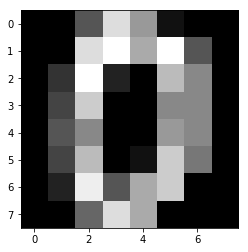

In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)
plt.imshow(digits.data[0].reshape(8,8), cmap = 'gray')
plt.show()

In [18]:
print(digits.target.shape)
print(digits.target[:50])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


In [19]:
digits_data=datasets.load_digits()
input_data=digits_data.data
correct=digits_data.target
n_data=len(correct)

In [20]:
print(n_data)
print(correct[:29])

1797
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8]


In [21]:
ave_input=np.average(input_data)
std_input=np.std(input_data)
input_data=(input_data-ave_input)/std_input

In [22]:
correct_data=np.zeros((n_data,10))
for i in range(n_data):
    correct_data[i,correct[i]]=1.0
print(correct_data[:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [23]:
index=np.arange(n_data)
print(index)

[   0    1    2 ... 1794 1795 1796]


In [24]:
index_train=index[index%3!=0]
index_test=index[index%3==0]
input_train = input_data[index_train, :] # 훈련 데이터 입력
correct_train = correct_data[index_train, :] # 훈련 데이터 정답
input_test = input_data[index_test, :] # 테스트 데이터 입력
correct_test = correct_data[index_test, :]

In [25]:
n_train = input_train.shape[0] # 훈련데이터 샘플 수
n_test = input_test.shape[0] # 테스트 데이터 샘플 수

In [26]:
img_h=8;img_w=8;img_ch=1
wb_width=0.1
eta=0.01
epoch=50
batch_size=8
interval=10
n_sample=200

In [37]:
cl_1 = ConvLayer(img_ch, img_h, img_w, 10, 3, 3, 1, 1)
pl_1 = PoolingLayer(cl_1.y_ch, cl_1.y_h, cl_1.y_w, 2, 0)
n_fc_in = pl_1.y_ch * pl_1.y_h * pl_1.y_w
ml_1 = MiddleLayer(n_fc_in, 100)
ol_1 = OutputLayer(100, 10)

In [38]:
def forward_propagation(x):
    n_bt=x.shape[0]
    images=x.reshape(n_bt,img_ch,img_h,img_w)
    cl_1.forward(images)
    pl_1.forward(cl_1.y)
    fc_input=pl_1.y.reshape(n_bt,-1)
    ml_1.forward(fc_input)
    ol_1.forward(ml_1.y)
def backpropagation(t):
    n_bt=t.shape[0]
    ol_1.backward(t)
    ml_1.backward(ol_1.grad_x)
    grad_img=ml_1.grad_x.reshape(n_bt,pl_1.y_ch,
                    pl_1.y_h,pl_1.y_w)
    pl_1.backward(grad_img)
    cl_1.backward(pl_1.grad_x)
def uppdate_wb():
    cl_1.update(eta)
    ml_1.update(eta)
    ol_1.update(eta)
def get_error(t,batch_size):
    return -np.sum(t*np.log(ol_1.y+1e-7))/batch_size
def forward_sample(inp,correct,n_sample):
    index_rand=np.arange(len(correct))
    np.random.shuffle(index_rand)
    index_rand=index_rand[:n_sample]
    x=inp[index_rand,:]
    t=correct[index_rand,:]
    forward_propagation(x)
    return x,t

In [39]:
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

In [40]:
n_batch=n_train//batch_size
for i in range(epoch):
    x,t=forward_sample(input_train,correct_train,n_sample)
    error_train=get_error(t,n_sample)
    x,t=forward_sample(input_test,correct_test,n_sample)
    error_test=get_error(t,n_sample)
    train_error_x.append(i)
    train_error_y.append(error_train)
    test_error_x.append(i)
    test_error_y.append(error_test)
    if i%interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
        "Error_train:" + str(error_train),
        "Error_test:" + str(error_test))
    index_rand = np.arange(n_train)
    np.random.shuffle(index_rand)
    for j in range(n_batch):
        mb_index = index_rand[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        forward_propagation(x)
        backpropagation(t)
        uppdate_wb()

Epoch:0/50 Error_train:2.639657438455062 Error_test:2.6168930744700107
Epoch:10/50 Error_train:1.847797235526557 Error_test:1.8331511173914885
Epoch:20/50 Error_train:1.7351251273078288 Error_test:1.7708185055451127
Epoch:30/50 Error_train:1.7216579556791691 Error_test:1.7125832551999725
Epoch:40/50 Error_train:1.738908269851342 Error_test:1.7155304738497394


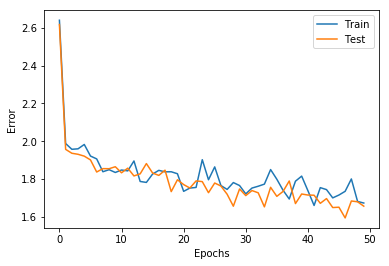

Accuracy Train: 48.9983305509182% Accuracy Test: 53.255425709515855%


In [41]:
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()
# -- 정답률 측정 --
x, t = forward_sample(input_train, correct_train, n_train)
count_train = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))
x, t = forward_sample(input_test, correct_test, n_test)
count_test = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))
print("Accuracy Train:", str(count_train/n_train*100) + "%",
"Accuracy Test:", str(count_test/n_test*100) + "%")

In [42]:
samples = input_test[:5]
forward_propagation(samples)
print(ol_1.y)
print(correct_test[:5])

[[0.21085764 0.08386069 0.10051804 0.09578472 0.0605543  0.09885047
  0.04859705 0.06581625 0.10915647 0.12600438]
 [0.08645593 0.11755066 0.11099559 0.19659734 0.04584268 0.13840601
  0.04960621 0.06128606 0.09528635 0.09797317]
 [0.08160743 0.12473305 0.09102926 0.08583695 0.05856226 0.08079901
  0.27636402 0.04866634 0.09465604 0.05774564]
 [0.10936438 0.10338081 0.10397249 0.11085611 0.07835075 0.11644953
  0.0667897  0.08062442 0.11598596 0.11422585]
 [0.10936438 0.10338081 0.10397249 0.11085611 0.07835075 0.11644953
  0.0667897  0.08062442 0.11598596 0.11422585]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
